# Revenue and Profit of Fortune 500 Companies.

[sharadpardhe08@gmail.com](link)

The dataset contain information about revenue and profit of Fortune 500 companies from year 1955 to year 2009.There are 5 column, these are year,rank,company name, revenue(in millions) and profit(in millions).The dataset is downloaded from kaggle in  csv format."

## Downloading the Dataset

The dataset is downloaded from kaggle and in the csv format.

[Dataset source url](https://www.kaggle.com/datasets/yashsrivastava51213/revenue-and-profit-of-fortune-500-companies)

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
# creating url variable called dataset_ulr
dataset_url = 'https://www.kaggle.com/datasets/yashsrivastava51213/revenue-and-profit-of-fortune-500-companies' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sharadpardhe
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████████████████████████| 328k/328k [00:01<00:00, 292kB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = r'revenue-and-profit-of-fortune-500-companies'

In [5]:
import os
os.listdir(data_dir)

['fortune500.csv']

Let us save and upload our work to Jovian before continuing.

## Data Preparation and Cleaning

#### Steps
1. Check  the datatype of column.
1. check any ```str``` value store inside the revenue or profit column. If availabel, change the datatype of that row.
1. Initially the datatype of columns - (Revenue and profit) were object that converted to float.  


In [8]:
# importing the pandas library
import pandas as pd 

In [11]:
# read csv file with the help of pandas
fortune_df = pd.read_csv(r'revenue-and-profit-of-fortune-500-companies\fortune500.csv')

In [12]:
# looking into the dataset 
fortune_df

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
29495,2009,996,Tellabs,"1,729.00",-930.1
29496,2009,997,Administaff,"1,724.40",45.8
29497,2009,998,Sanderson Farms,"1,723.60",-43.1
29498,2009,999,MGIC Investment,"1,721.50",-518.9


In [13]:
# cheking the shape of the dataset
fortune_df.shape

(29500, 5)

There are 5 column and 29500 rows.

In [14]:
# checking the info of the dataset 
fortune_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   29500 non-null  int64 
 1   Rank                   29500 non-null  int64 
 2   Company                29500 non-null  object
 3   Revenue (in millions)  29500 non-null  object
 4   Profit (in millions)   29500 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


After checking the csv file in excel there ```N.A.``` entry in ```Profit (in millions)``` column which needs to replaced with 0.

In [15]:
# cheking N.A. in ['Profit (in millions)'] column 
fortune_df[fortune_df['Profit (in millions)'] == 'N.A.']

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
228,1955,229,Norton,135,N.A.
290,1955,291,Schlitz Brewing,100,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.
...,...,...,...,...,...
24242,2003,243,Farmland Industries,7580.2,N.A.
24296,2003,297,Land O'Lakes,5847,N.A.
24435,2003,436,Roundy's,3637.9,N.A.
24489,2003,490,Ace Hardware,3029,N.A.


In [16]:
# cheking N.A. in column Revenue
fortune_df[fortune_df['Revenue (in millions)'] == 'N.A.']

,Year,Rank,Company,Revenue (in millions),Profit (in millions)


Only ```Profit (in millions)``` contain ```N.A.``` value and ```Revenue (in millions)``` contain only numeric data.Now replace the record which contain ```N.A.``` to 0 in ```Profit (in millions)```.

In [17]:
# replacing 'N.A.' entry to 0
fortune_df.replace('N.A.',0,inplace= True)

In [18]:
# cheking 0 in column Profit
fortune_df[fortune_df['Profit (in millions)'] == 0]

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
228,1955,229,Norton,135,0
290,1955,291,Schlitz Brewing,100,0
294,1955,295,Pacific Vegetable Oil,97.9,0
296,1955,297,Liebmann Breweries,96,0
352,1955,353,Minneapolis-Moline,77.4,0
...,...,...,...,...,...
24242,2003,243,Farmland Industries,7580.2,0
24296,2003,297,Land O'Lakes,5847,0
24435,2003,436,Roundy's,3637.9,0
24489,2003,490,Ace Hardware,3029,0


In [19]:
fortune_df

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
29495,2009,996,Tellabs,"1,729.00",-930.1
29496,2009,997,Administaff,"1,724.40",45.8
29497,2009,998,Sanderson Farms,"1,723.60",-43.1
29498,2009,999,MGIC Investment,"1,721.50",-518.9


In this dataset, the datatype of ```revenue and profit``` are in ```object(str)``` that needs to be change to ```float```.

In [20]:
fortune_df['Revenue (in millions)'] = fortune_df['Revenue (in millions)'].str.replace(',', '').astype(float)

In [21]:
fortune_df['Profit (in millions)'] = fortune_df['Profit (in millions)'].str.replace(',', '').astype(float)

In [22]:
fortune_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   29500 non-null  int64  
 1   Rank                   29500 non-null  int64  
 2   Company                29500 non-null  object 
 3   Revenue (in millions)  29500 non-null  float64
 4   Profit (in millions)   29131 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ MB


Now we have transformed the dataset. There is not N.A. entry and the datatype of column have been change so mathematical calculation can be perform. 

In [23]:
# checking the duplicate in the dataset
fortune_df[fortune_df.duplicated()]

,Year,Rank,Company,Revenue (in millions),Profit (in millions)


In [24]:
# Get the isight of the data mainly range and other useful information
fortune_df.describe()

,Year,Rank,Revenue (in millions),Profit (in millions)
count,29500.000000,29500.000000,29500.000000,29131.000000
mean,1983.728814,284.397966,5237.162102,261.249765
std,16.616417,191.401503,14335.344473,1665.134007
min,1955.000000,1.000000,49.700000,-99289.000000
25%,1969.000000,135.000000,443.275000,9.700000
50%,1984.000000,269.000000,1498.050000,44.900000
75%,1999.000000,403.000000,4607.825000,206.300000
max,2009.000000,1000.000000,442851.000000,45220.000000


## Exploratory Analysis and Visualization

> - Number of unique company is in dataset.
> - Number of comapny in the different year.
> - Sum of the revenue by every year.
> - Sum of the profit by every year.
> - mean of the revenue and profit by every year.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [26]:
# Total number of unique companies in the dataset
unique_comapny = len(pd.unique(fortune_df['Company']))
print(f'There are {unique_comapny} unique companies in the dataset.') 

There are 2588 unique companies in the dataset.


In [27]:
# Total number of distinct company groupby the year 
df_year_com = fortune_df.groupby('Year')[['Company']].nunique()
df_year_com

,Company
Year,
1955,500
1956,500
1957,500
1958,500
1959,500
1960,500
1961,500
1962,500
1963,500


In [28]:
# Total revenue by year
df_year_r = fortune_df.groupby('Year')[['Revenue (in millions)']].sum()
df_year_r

,Revenue (in millions)
Year,
1955,136783.0
1956,161398.5
1957,174306.5
1958,188312.2
1959,176830.9
1960,197395.6
1961,204723.7
1962,209194.3
1963,229082.1


In [29]:
# Total profit by year
df_year_pro = fortune_df.groupby('Year')[['Profit (in millions)']].sum()
df_year_pro

,Profit (in millions)
Year,
1955,8265.7
1956,11209.6
1957,11521.0
1958,11658.0
1959,9581.8
1960,11985.7
1961,11623.5
1962,11616.4
1963,13482.5


In [30]:
# mean of  revenue and profit by year
df_year_rp_mean = fortune_df.groupby('Year')[['Revenue (in millions)','Profit (in millions)']].max()
df_year_rp_mean

,Revenue (in millions),Profit (in millions)
Year,,
1955,9823.5,806.0
1956,12443.3,1189.5
1957,10796.4,847.4
1958,10989.8,843.6
1959,9522.0,633.6
1960,11233.1,873.1
1961,12736.0,959.0
1962,11395.9,892.8
1963,14640.2,1459.1


In [31]:
# Information of top company by year
df_first_rank = fortune_df[fortune_df['Rank']==1]
df_first_rank.reset_index(drop=True, inplace=True)
df_first_rank

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806.0
1,1956,1,General Motors,12443.3,1189.5
2,1957,1,General Motors,10796.4,847.4
3,1958,1,General Motors,10989.8,843.6
4,1959,1,General Motors,9522.0,633.6
5,1960,1,General Motors,11233.1,873.1
6,1961,1,General Motors,12736.0,959.0
7,1962,1,General Motors,11395.9,892.8
8,1963,1,General Motors,14640.2,1459.1
9,1964,1,General Motors,16494.8,1591.8


# Graph 1
**Area** - Year vs (Reveneu)       
How year wise reveneu is changing.

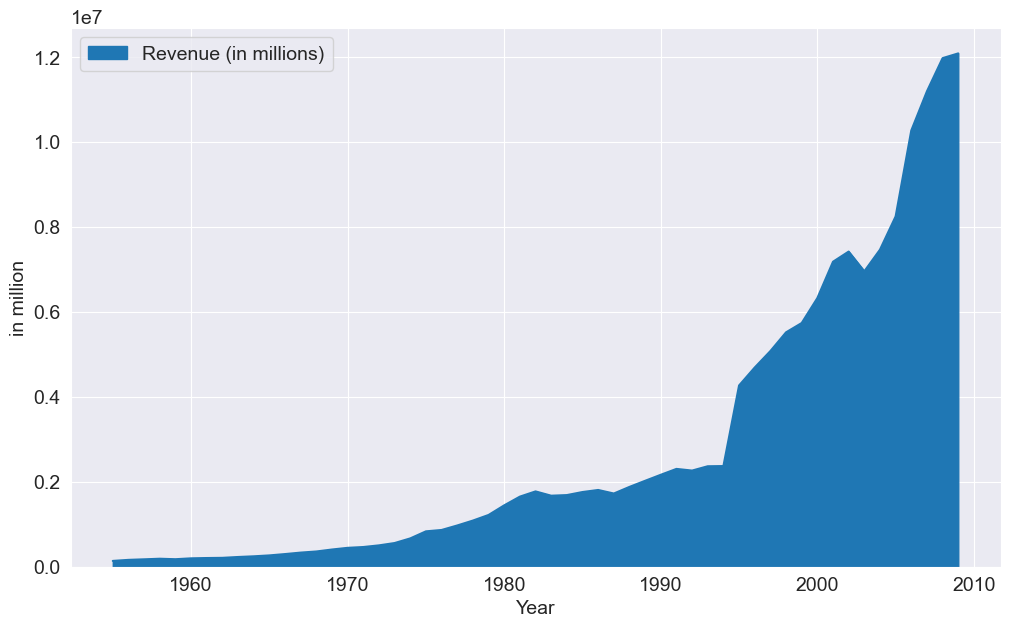

In [32]:
df_year_r.plot(xlabel = 'Year', ylabel = 'in million',kind='area');

# Graph 2
**line graph** Year vs Profit
How profit is changing wrt Year

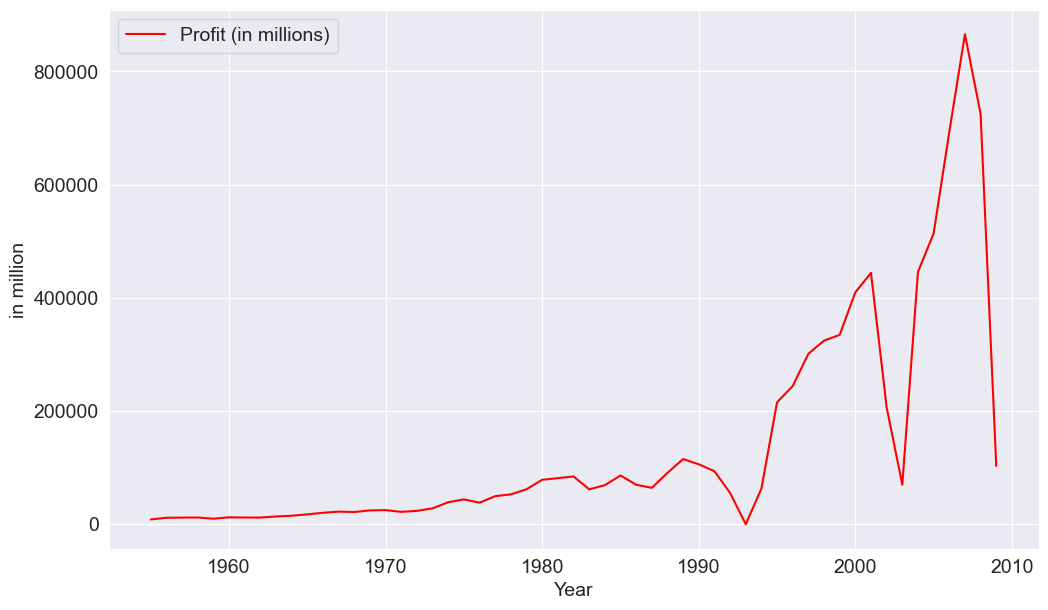

In [33]:
df_year_pro.plot(xlabel = 'Year', ylabel = 'in million',kind='line',color = 'red');

# Graph 3 
**Bar chart** Year vs Number of comapany        
It shows that after 2005, there were 1000 comapny instead of 500 in the dataset.

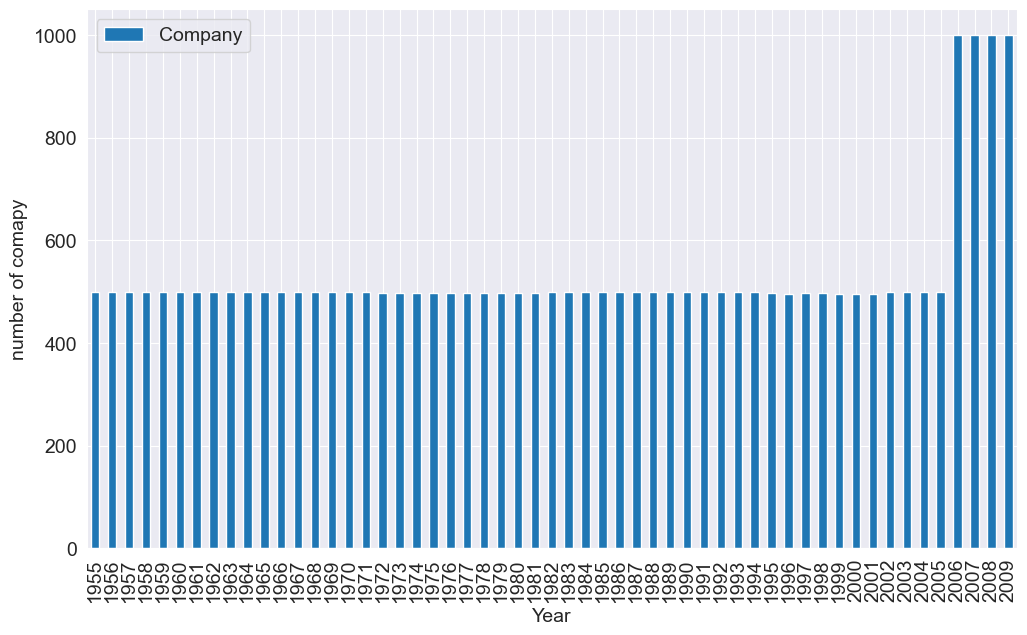

In [34]:
df_year_com.plot(xlabel= 'Year', ylabel = 'number of comapy',kind='bar');

# Graph 4
**Scatter Plot** Year vs (revenue)

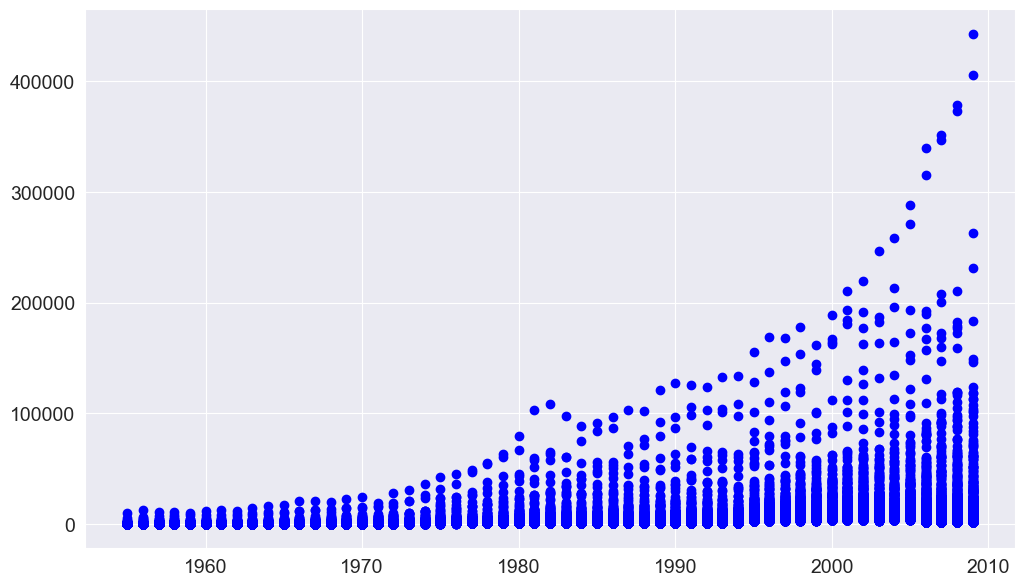

In [35]:
plt.scatter(x = fortune_df['Year'], y = fortune_df['Revenue (in millions)'], c ="blue")
 
# To show the plot
plt.show()

# Graph 5
**histogram** - Explore one or more columns by plotting a graph below, and add some explanation about it

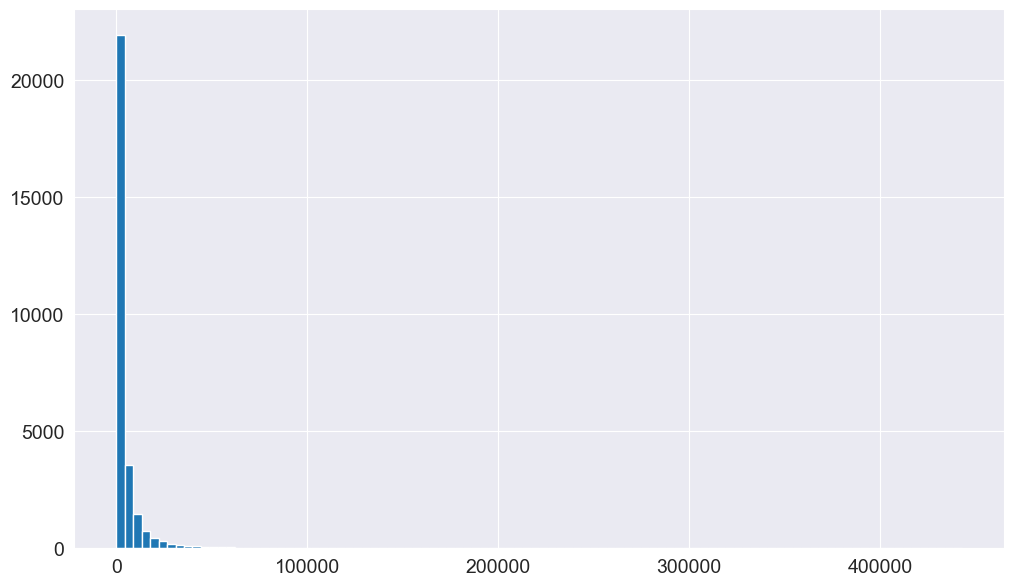

In [36]:
plt.hist(fortune_df["Revenue (in millions)"],bins = 100)
plt.show()

## Asking and Answering Questions

Here in this section of the dataset, we are going to ask interesting question about the dataset.

#### Q1: Profit to revenue ratio for each and every company  in the dataset?

In [37]:
fortune_df['Profit/revenue in %'] = (fortune_df['Profit (in millions)'] / fortune_df['Revenue (in millions)']) * 100
fortune_df

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Profit/revenue in %
0,1955,1,General Motors,9823.5,806.0,8.204815
1,1955,2,Exxon Mobil,5661.4,584.8,10.329600
2,1955,3,U.S. Steel,3250.4,195.4,6.011568
3,1955,4,General Electric,2959.1,212.6,7.184617
4,1955,5,Esmark,2510.8,19.1,0.760714
...,...,...,...,...,...,...
29495,2009,996,Tellabs,1729.0,-930.1,-53.794101
29496,2009,997,Administaff,1724.4,45.8,2.655996
29497,2009,998,Sanderson Farms,1723.6,-43.1,-2.500580
29498,2009,999,MGIC Investment,1721.5,-518.9,-30.142318


#### Q2: Year wise find out the mean,min and max Profit/Revenue ratio? 

In [38]:
result = fortune_df.groupby('Year').agg({'Profit/revenue in %': ['mean', 'min', 'max']})
result

Profit/revenue in %                         
                    mean          min         max
Year                                             
1955            5.236943   -16.713748   36.052009
1956            5.937590    -6.825939   34.615385
1957            6.227044   -34.092409  114.884980
1958            5.539353   -12.035851   26.307922
1959            4.904717   -11.756757   21.887160
1960            5.559156   -18.700265   23.437500
1961            4.844246   -33.194329   26.953125
1962            4.766557   -25.097125   27.821012
1963            4.912609   -17.904509   29.385965
1964            4.959757   -20.059509   30.166788
1965            5.509485    -9.971306   31.559633
1966            5.869972   -24.420451   27.381522
1967            6.138061    -3.820149   39.214660
1968            5.484922    -9.742931   26.748971
1969            5.372104   -11.848101   26.503759
1970            5.123125    -4.369213   25.699958
1971            4.144387   -47.324589   35.009311
1972            3.964263   -37.654517   27.594937
1973            4.325237   -31.595632   18.970448
1974            5.063871    -9.451575   24.170173
1975            4.869987   -10.432416   25.927880
1976            4.296611   -17.597352   23.211876
1977            5.022809   -12.348898   27.915704
1978            4.731148   -20.869789   22.883135
1979            5.186002    -6.674832   20.026869
1980            5.597329    -9.181833   21.454869
1981            5.005896   -18.974484   29.868819
1982            4.887724   -42.492230  100.524394
1983            3.481415   -34.670166   17.206704
1984            3.411912   -66.614148   15.738139
1985            4.224239   -73.049533   18.962392
1986            3.289889   -44.501542   19.564763
1987            3.380384   -59.024935   20.915033
1988            4.604571  -190.654206   61.001789
1989            5.446377   -60.519481   70.641762
1990            4.815511   -28.355556   28.441326
1991            4.139936   -75.546720   48.921891
1992            2.722275   -93.892045   32.616163
1993            1.339387   -82.023810   31.690890
1994            1.840751  -174.965986  103.643832
1995            5.319377   -16.029530   44.182653
1996            5.608292   -25.569564   46.160311
1997            5.598811   -53.411113   54.304120
1998            5.448256   -32.419498   30.410284
1999            5.271865   -17.997887   43.059395
2000            5.947079   -40.228503   45.935628
2001            5.842281   -28.874603   62.159307
2002           -0.613208 -1736.015219   32.503083
2003           -0.076312  -321.148759   37.125817
2004            5.110620   -76.309057   48.792917
2005            5.630989   -87.221218   40.649819
2006            6.741938  -121.848208   56.345790
2007            7.004890   -45.735839  124.980653
2008            5.953473  -118.272598   70.870337
2009           -0.632853  -894.173271   88.382650

#### Q3: Year wise max profit/revenue ratio, comapany information?

In [39]:
idx =fortune_df.groupby(['Year'])['Profit/revenue in %'].transform(max) ==fortune_df['Profit/revenue in %']
fortune_df[idx]

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Profit/revenue in %
331,1955,332,Texasgulf,84.6,30.5,36.052009
820,1956,321,Texasgulf,93.6,32.4,34.615385
1423,1957,424,Emerson Radio & Phonograph,73.9,84.9,114.884980
1988,1958,489,Texasgulf,66.9,17.6,26.307922
2337,1959,338,Amerada Hess,102.8,22.5,21.887160
2878,1960,379,Amerada Hess,102.4,24.0,23.437500
3382,1961,383,Amerada Hess,102.4,27.6,26.953125
3892,1962,393,Amerada Hess,102.8,28.6,27.821012
4395,1963,396,Amerada Hess,114.0,33.5,29.385965
4854,1964,355,Amerada Hess,137.9,41.6,30.166788


#### Q4: Year wise name of the company whose profit in maximum?

In [40]:
idx =fortune_df.groupby(['Year'])['Profit (in millions)'].transform(max) ==fortune_df['Profit (in millions)']
fortune_df[idx]

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Profit/revenue in %
0,1955,1,General Motors,9823.5,806.0,8.204815
500,1956,1,General Motors,12443.3,1189.5,9.559361
1000,1957,1,General Motors,10796.4,847.4,7.848913
1500,1958,1,General Motors,10989.8,843.6,7.676209
2000,1959,1,General Motors,9522.0,633.6,6.654064
2500,1960,1,General Motors,11233.1,873.1,7.772565
3000,1961,1,General Motors,12736.0,959.0,7.529837
3500,1962,1,General Motors,11395.9,892.8,7.834397
4000,1963,1,General Motors,14640.2,1459.1,9.966394
4500,1964,1,General Motors,16494.8,1591.8,9.650314


#### Q5: Year wise ranking information about General Motors?

In [41]:
fortune_df[fortune_df['Company'] == 'General Motors']

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Profit/revenue in %
0,1955,1,General Motors,9823.5,806.0,8.204815
500,1956,1,General Motors,12443.3,1189.5,9.559361
1000,1957,1,General Motors,10796.4,847.4,7.848913
1500,1958,1,General Motors,10989.8,843.6,7.676209
2000,1959,1,General Motors,9522.0,633.6,6.654064
2500,1960,1,General Motors,11233.1,873.1,7.772565
3000,1961,1,General Motors,12736.0,959.0,7.529837
3500,1962,1,General Motors,11395.9,892.8,7.834397
4000,1963,1,General Motors,14640.2,1459.1,9.966394
4500,1964,1,General Motors,16494.8,1591.8,9.650314


## Inferences and Conclusion
In this project of fortune 500 companies, following steps follows

**Data cleaning and preparation** 
> 1. Check the datatype of all the column inside the dataset.
> 2. Replace 'N.A.' entry with '0' in the profit column.
> 3. Convert the datatype of revenue and profit column from str to float.

**Exploratory Analysis and Visualization**
> 1. Total number of unique companies in the dataset.
> 2. sum,mean of revenue and profit column by year.
> 3. Visulalize the important insight,

**Asking the intresting and important question and answer those question about the dataset.**

In [42]:
fortune_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   29500 non-null  int64  
 1   Rank                   29500 non-null  int64  
 2   Company                29500 non-null  object 
 3   Revenue (in millions)  29500 non-null  float64
 4   Profit (in millions)   29131 non-null  float64
 5   Profit/revenue in %    29131 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.4+ MB
